## **アヤメの分類**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

***

**【問題1】練習のために特徴量とカテゴリを選択**  
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。


virgicolorとvirginica
sepal_lengthとpetal_length

《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [2]:
from sklearn.datasets import load_iris
iris_data = load_iris()

df = pd.DataFrame(iris_data.data, columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])
df["target"] = iris_data.target
#df.loc[df['target'] == 0, 'target'] = "setosa"
#df.loc[df['target'] == 1, 'target'] = "versicolor"
#df.loc[df['target'] == 2, 'target'] = "virginica"

#df_1 = df.loc[df["target"].isin(["versicolor", "virginica"]), ["sepal_length", "petal_length", "target"]]
df_1 = df.loc[df["target"].isin([1, 2]), ["sepal_length", "petal_length", "target"]]

In [3]:
display(df_1)

,sepal_length,petal_length,target
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
55,5.7,4.5,1
56,6.3,4.7,1
57,4.9,3.3,1
58,6.6,4.6,1
59,5.2,3.9,1


***

**【問題2】データの分析**  
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。

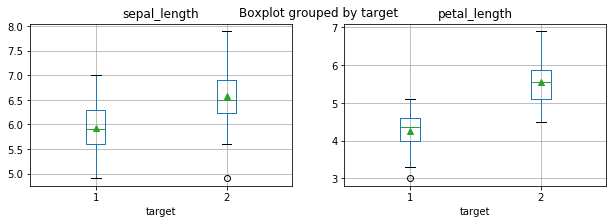

In [4]:
#箱ひげ図

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

df_1.boxplot(ax=axes[0], column=["sepal_length"], by="target", showmeans=True)
df_1.boxplot(ax=axes[1], column=["petal_length"], by="target", showmeans=True)
plt.show()

/Users/itonaoki/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


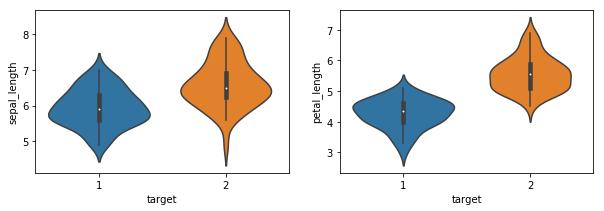

In [5]:
#バイオリン図

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

sns.violinplot(ax=axes[0], x=df_1["target"], y=df_1["sepal_length"]) 
sns.violinplot(ax=axes[1], x=df_1["target"], y=df_1["petal_length"]) 

plt.show()

***

**【問題3】前処理・訓練データと検証データの分割**  
前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


《注意点》  
データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》  
分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [6]:
X, y = df_1.loc[:, ["sepal_length","petal_length" ]].values, df_1.loc[:, "target"].values

from sklearn.model_selection import train_test_split
# train_test_splitはデフォルトで訓練データ75％、検証データ25％
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

***

**【問題4】前処理・標準化**  
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


[sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


《注意点》  
標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。


《実際の問題での前処理は？》  
アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。



In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test) #X_trainとX_test 一気にtransformできる？

***

**【問題5】学習と推定**  
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練データです。


[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。



In [8]:
from sklearn.neighbors import KNeighborsClassifier

clf_5nn = KNeighborsClassifier().fit(X_train_scaler, y_train)
print("Test set predictions:\n{}".format(clf_5nn.predict(X_test_scaler)))
print("Test set accuracy:{}".format(clf_5nn.score(X_test_scaler, y_test)))
print("Train set accuracy:{}".format(clf_5nn.score(X_train_scaler, y_train)))

Test set predictions:
[1 2 1 2 2 2 1 2 2 2 2 2 2 2 1 1 2 1 2 1 1 2 1 2 1]
Test set accuracy:0.88
Train set accuracy:0.9333333333333333


In [9]:
clf_3nn = KNeighborsClassifier(n_neighbors=3).fit(X_train_scaler, y_train)
print("Test set predictions:\n{}".format(clf_3nn.predict(X_test_scaler)))
print("Test set accuracy:{}".format(clf_3nn.score(X_test_scaler, y_test)))
print("Train set accuracy:{}".format(clf_3nn.score(X_train_scaler, y_train)))

Test set predictions:
[1 2 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Test set accuracy:0.92
Train set accuracy:0.9333333333333333


In [10]:
clf_1nn = KNeighborsClassifier(n_neighbors=1).fit(X_train_scaler, y_train)
print("Test set predictions:\n{}".format(clf_1nn.predict(X_test_scaler)))
print("Test set accuracy:{}".format(clf_1nn.score(X_test_scaler, y_test)))
print("Train set accuracy:{}".format(clf_1nn.score(X_train_scaler, y_train)))

Test set predictions:
[1 2 2 2 2 2 1 2 2 1 2 2 2 1 1 1 2 1 2 1 1 2 1 2 1]
Test set accuracy:0.84
Train set accuracy:1.0


In [11]:
clf_20nn = KNeighborsClassifier(n_neighbors=20).fit(X_train_scaler, y_train)
print("Test set predictions:\n{}".format(clf_20nn.predict(X_test_scaler)))
print("Test set accuracy:{}".format(clf_20nn.score(X_test_scaler, y_test)))
print("Train set accuracy:{}".format(clf_20nn.score(X_train_scaler, y_train)))

Test set predictions:
[1 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1]
Test set accuracy:0.84
Train set accuracy:0.9333333333333333


【考察】  
n_neighborsについて、  
- 1で作成したモデルは、訓練データ入力時の正解率は100％（当たり前？？）  
- 3で作成したモデルが一番検証データ入力時の正解率が高く92％  

ただ、ｎ数を多くすれば検証データでの正解率が高くなる訳でもない。  
最適なｎ数を探す必要がある。

***

**問題6】評価**  
検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


- scikit-learnを使い4種類の指標を計算する
- 混同行列をscikit-learnを使い表示する
- 4種類の指標値の意味について簡単に調査して文章でまとめる

[sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
[sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score)  
[sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score)  
[sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)  
[sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("3nn Test set accuracy:{}".format(accuracy_score(y_test, clf_3nn.predict(X_test_scaler))))
print("3nn Test set accuracy num:{}".format(accuracy_score(y_test, clf_3nn.predict(X_test_scaler), normalize=False)))
print("---------------------")
print("3nn Test set precision of versicolor:{}".format(precision_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=1)))
print("3nn Test set precision of virginica:{}".format(precision_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=2)))
print("---------------------")
print("3nn Test set recall of versicolor:{}".format(recall_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=1)))
print("3nn Test set recall of virginica:{}".format(recall_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=2)))
print("---------------------")
print("3nn Test set f1 of versicolor:{}".format(f1_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=1)))
print("3nn Test set f1 of virginica:{}".format(f1_score(y_test, clf_3nn.predict(X_test_scaler), pos_label=2)))

3nn Test set accuracy:0.92
3nn Test set accuracy num:23
---------------------
3nn Test set precision of versicolor:1.0
3nn Test set precision of virginica:0.8571428571428571
---------------------
3nn Test set recall of versicolor:0.8461538461538461
3nn Test set recall of virginica:1.0
---------------------
3nn Test set f1 of versicolor:0.9166666666666666
3nn Test set f1 of virginica:0.923076923076923


In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, clf_3nn.predict(X_test_scaler)))

[[11  2]
 [ 0 12]]


![](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/70152/29cc37e7-ff2e-d781-d4a4-e328fd7526a1.png)
>https://qiita.com/TsutomuNakamura/items/a1a6a02cb9bb0dcbb37f

- 正解率 (精度, accuracy)：正や負と予測したデータのうち，実際にそうであるものの割合
- 適合率 (precision)：正と予測したデータのうち，実際に正であるものの割合
- 再現率 (recall, 感度, sensitivity)：実際に正であるもののうち，正であると予測されたものの割合
- F値 (F尺度, F-measure)：再現率と適合率の調和平均
>http://ibisforest.org/index.php?F%E5%80%A4

***

**【問題7】可視化**  
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

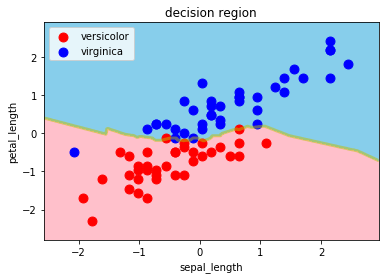

In [15]:
#3-nnモデルで訓練データをプロット
decision_region(X_train_scaler, y_train, clf_3nn, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

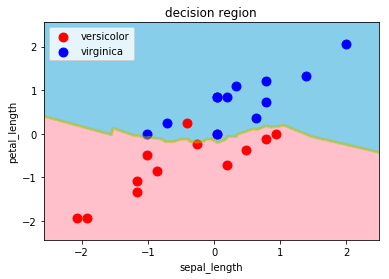

In [16]:
#3-nnモデルで検証データをプロット
decision_region(X_test_scaler, y_test, clf_3nn, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])

検証データプロットの可視化を見ると、プロット数が23個しかない。25個のデータを与えたのになぜ？？

***

**【問題8】他の手法の学習**  
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


- 最近傍法
- ロジスティック回帰
- SVM
- 決定木
- ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。  
[sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)  
[sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  
[sklearn.svm.SVC — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)  
[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)  
[sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)  

《実際の問題では？》  
ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

In [17]:
def result_each_method(model):
    """
    モデルを入力すると、
    ・そのモデルの指標値
    ・そのモデルの混同行列
    ・そのモデルに検証データを与えた際の散布図（決定領域可視化）
    を作成する関数
    
    Parameter
    ---------
    model：モデル 
    """
    instance = model.fit(X_train_scaler, y_train)
    print("accuracy:{}".format(accuracy_score(y_test, instance.predict(X_test_scaler))))
    print("---------------------")
    print("precision:{}".format(precision_score(y_test, instance.predict(X_test_scaler))))
    print("---------------------")
    print("recall:{}".format(recall_score(y_test, instance.predict(X_test_scaler))))
    print("---------------------")
    print("f1:{}".format(f1_score(y_test, instance.predict(X_test_scaler))))
    print("---------------------")
    print(confusion_matrix(y_test, instance.predict(X_test_scaler)))
    
    decision_region(X_test_scaler, y_test, instance, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
    
    

- 最近傍法

accuracy:0.88
---------------------
precision:1.0
---------------------
recall:0.7692307692307693
---------------------
f1:0.8695652173913044
---------------------
[[10  3]
 [ 0 12]]


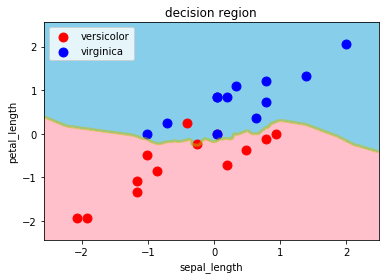

In [18]:
from sklearn.neighbors import KNeighborsClassifier
result_each_method(KNeighborsClassifier())

- ロジスティック回帰

accuracy:0.92
---------------------
precision:1.0
---------------------
recall:0.8461538461538461
---------------------
f1:0.9166666666666666
---------------------
[[11  2]
 [ 0 12]]


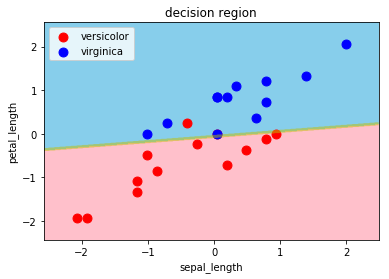

In [19]:
from sklearn.linear_model import LogisticRegression
result_each_method(LogisticRegression())

- SVM

accuracy:0.92
---------------------
precision:1.0
---------------------
recall:0.8461538461538461
---------------------
f1:0.9166666666666666
---------------------
[[11  2]
 [ 0 12]]


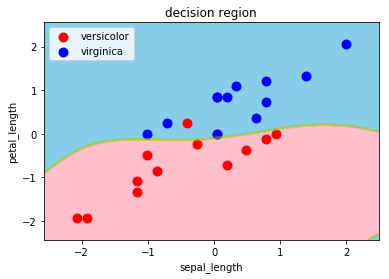

In [20]:
from sklearn.svm import SVC
result_each_method(SVC())

- 決定木

accuracy:0.88
---------------------
precision:1.0
---------------------
recall:0.7692307692307693
---------------------
f1:0.8695652173913044
---------------------
[[10  3]
 [ 0 12]]


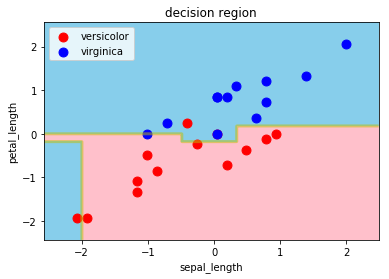

In [21]:
from sklearn.tree import DecisionTreeClassifier
result_each_method(DecisionTreeClassifier())

- ランダムフォレスト

accuracy:0.88
---------------------
precision:1.0
---------------------
recall:0.7692307692307693
---------------------
f1:0.8695652173913044
---------------------
[[10  3]
 [ 0 12]]


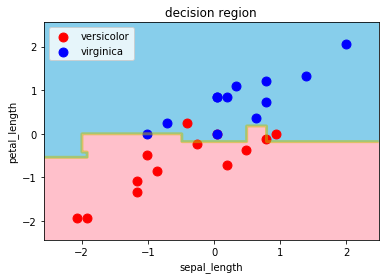

In [33]:
from sklearn.ensemble import RandomForestClassifier
result_each_method(RandomForestClassifier())

|---|正解率(accuracy)|適合率(precision)|再現率(recall)|F値(F measure)|
|-|-|-|-|-|
|最近傍法               |0.88|1.0|0.7692307692307693|0.8695652173913044|
|ロジスティック回帰|0.92|1.0|0.8461538461538461|0.9166666666666666|
|SVM                    |0.92|1.0|0.8461538461538461|0.9166666666666666|
|決定木                  |0.88|1.0|0.7692307692307693|0.8695652173913044|
|ランダムフォレスト |0.88|1.0|0.7692307692307693|0.8695652173913044|

【結果と考察】  
- 正解率が高かったのは、「ロジスティック回帰」「SVM」の2つ。
- 適合率は全て100％
- 境界線をみる限り、正解率100％を出すのは難しそう。境界線の引き方が複雑なモデル程、正答率が上がりそう。反面、計算時間は掛かりそう。
- 2特徴量間の散布図でversicolorとvirginicaの分布が比較的綺麗に分かれているので、全ての予測モデルでまずまずの結果が出ている。このような特徴量の組み合わせを見つけられるかどうかが大切なのかもしれない。
- グラフでのプロット数が23個しかないのと、混同行列の値が一致していないように見えるのが気になる。

***

**【問題9】（アドバンス課題）標準化の有無の比較**  
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [23]:
def result_each_method2(model):
    """
    モデルを入力すると、
    ・そのモデルの指標値
    ・そのモデルの混同行列
    ・そのモデルに検証データを与えた際の散布図（決定領域可視化）
    を作成する関数
    
    Parameter
    ---------
    model：モデル 
    """
    instance = model.fit(X_train, y_train)
    print("accuracy:{}".format(accuracy_score(y_test, instance.predict(X_test))))
    print("---------------------")
    print("precision:{}".format(precision_score(y_test, instance.predict(X_test))))
    print("---------------------")
    print("recall:{}".format(recall_score(y_test, instance.predict(X_test))))
    print("---------------------")
    print("f1:{}".format(f1_score(y_test, instance.predict(X_test))))
    print("---------------------")
    print(confusion_matrix(y_test, instance.predict(X_test)))
    
    decision_region(X_test, y_test, instance, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica'])
        

accuracy:0.92
---------------------
precision:1.0
---------------------
recall:0.8461538461538461
---------------------
f1:0.9166666666666666
---------------------
[[11  2]
 [ 0 12]]


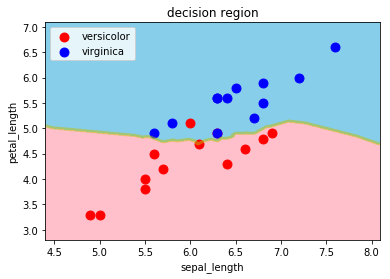

In [24]:
# 最近傍法
result_each_method2(KNeighborsClassifier())

accuracy:0.88
---------------------
precision:1.0
---------------------
recall:0.7692307692307693
---------------------
f1:0.8695652173913044
---------------------
[[10  3]
 [ 0 12]]


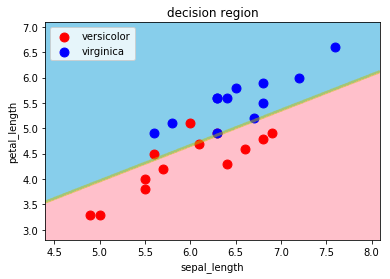

In [25]:
#ロジスティック回帰
result_each_method2(LogisticRegression())

accuracy:0.92
---------------------
precision:1.0
---------------------
recall:0.8461538461538461
---------------------
f1:0.9166666666666666
---------------------
[[11  2]
 [ 0 12]]


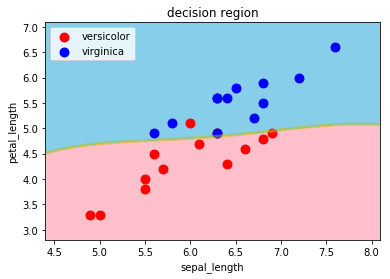

In [26]:
#SVM
result_each_method2(SVC())

accuracy:0.84
---------------------
precision:0.9090909090909091
---------------------
recall:0.7692307692307693
---------------------
f1:0.8333333333333333
---------------------
[[10  3]
 [ 1 11]]


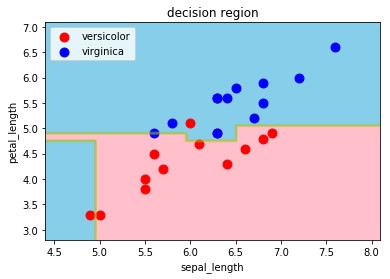

In [27]:
#決定木
result_each_method2(DecisionTreeClassifier())

accuracy:0.84
---------------------
precision:0.9090909090909091
---------------------
recall:0.7692307692307693
---------------------
f1:0.8333333333333333
---------------------
[[10  3]
 [ 1 11]]


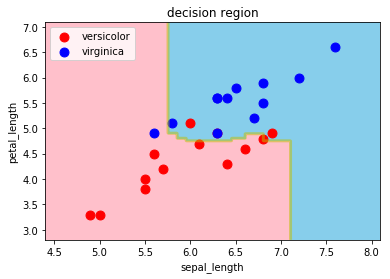

In [28]:
#ランダムフォレスト
result_each_method2(RandomForestClassifier())

|---|正解率(accuracy)|適合率(precision)|再現率(recall)|F値(F measure)|
|-|-|-|-|-|
|最近傍法               |0.92|1.0|0.8461538461538461|0.9166666666666666|
|ロジスティック回帰|0.88|1.0|0.7692307692307693|0.8695652173913044|
|SVM                    |0.92|1.0|0.8461538461538461|0.9166666666666666|
|決定木                  |0.84|0.9090909090909091|0.7692307692307693|0.8333333333333333|
|ランダムフォレスト |0.84|0.9090909090909091|0.7692307692307693|0.8333333333333333|

- 標準化したデータで訓練、検証をした場合  

|---|正解率(accuracy)|適合率(precision)|再現率(recall)|F値(F measure)|
|-|-|-|-|-|
|最近傍法               |0.88|1.0|0.7692307692307693|0.8695652173913044|
|ロジスティック回帰|0.92|1.0|0.8461538461538461|0.9166666666666666|
|SVM                    |0.92|1.0|0.8461538461538461|0.9166666666666666|
|決定木                  |0.88|1.0|0.7692307692307693|0.8695652173913044|
|ランダムフォレスト |0.92|1.0|0.8461538461538461|0.9166666666666666|

【結果と考察】
- 最近傍法とランダムフォレストに関しては正解率が上がっているものの、予測モデル全体でみると標準化した場合の方が正解率は高い。
- 予測モデルによって適切な前処理がありそう。
- 標準化をして全ての特徴量値の土俵を合わせることで、特定の特徴量値に依存するといったことがなくなり、フェアな予測モデルになるのだと思う。（標準化をしないと、数値的に大きい特徴量があれば、計算で使う数値も大きくなり極端な予測モデルになりそう）
- グラフでのプロット数が23個しかないのと、混同行列の値が一致していないように見えるのが気になる。


以下は調査したもの  
AIにおけるデータ標準化のメリットの一つは、データのスケールを小さくして、学習速度を上げることです。それ以外にも、スケールの異なる複数の説明変数（身長、体重など）を正規化する場合にも使用されます。各説明変数間のスケールが大きく異なる場合、スケールの大きい変数が学習に影響を与えてしまうため、標準化を用いてこれを是正できます。
>https://nine-num-98.blogspot.com/2019/12/ai-normalization.html

**【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法**  
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》  
指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [29]:
df_2 = df.loc[:, ["sepal_length", "petal_length", "target"]]
display(df_2)

,sepal_length,petal_length,target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [30]:
#分割
X2, y2 = df_2.loc[:, ["sepal_length","petal_length" ]].values, df_2.loc[:, "target"].values

from sklearn.model_selection import train_test_split
# train_test_splitはデフォルトで訓練データ75％、検証データ25％
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=0)

In [34]:
#標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X2_train)

X2_train_scaler = scaler.transform(X2_train)
X2_test_scaler = scaler.transform(X2_test)

In [35]:
#学習、推定、評価

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=["setona", 'versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', "green"]
    contourf_color = ['pink', 'skyblue', "lightgreen"]
    n_class = 3
    # pred
    mesh_f0, mesh_f1, mesh_f2  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step), np.arange(np.min(X[:,2])-0.5, np.max(X[:,2])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1),np.ravel(mesh_f2)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, mesh_f2, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1 ,mesh_f2, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], X[y==target][:, 2], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def result_each_method3(model):
    """
    モデルを入力すると、
    ・そのモデルの指標値
    ・そのモデルの混同行列
    ・そのモデルに検証データを与えた際の散布図（決定領域可視化）
    を作成する関数
    
    Parameter
    ---------
    model：モデル 
    """
    instance = model.fit(X2_train_scaler, y2_train)
    print("accuracy:{}".format(accuracy_score(y2_test, instance.predict(X2_test_scaler))))
    print("---------------------")
    print("precision:{}".format(precision_score(y2_test, instance.predict(X2_test_scaler), average="micro")))
    print("---------------------")
    print("recall:{}".format(recall_score(y2_test, instance.predict(X2_test_scaler), average="micro")))
    print("---------------------")
    print("f1:{}".format(f1_score(y2_test, instance.predict(X2_test_scaler), average="micro")))
    print("---------------------")
    #print(confusion_matrix(y_test, instance.predict(X_test_scaler)))
    
    decision_region2(X2_test_scaler, y_test, instance, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=["setona", 'versicolor', 'virginica'])
    
    

In [36]:
# 最近傍法
result_each_method3(KNeighborsClassifier())

accuracy:0.9473684210526315
---------------------
precision:0.9473684210526315
---------------------
recall:0.9473684210526315
---------------------
f1:0.9473684210526315
---------------------


IndexError: index 2 is out of bounds for axis 1 with size 2